C:\Users\22970\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Homogeneity Score: 0.8788
Completeness Score: 0.8730

Homogeneity measures the extent to which each cluster contains samples from a single class.
A homogeneity score close to 1 means that each cluster mostly contains samples from one true class, indicating that the clustering effectively separates different classes. A lower score indicates that clusters contain mixed samples from multiple classes.

Completeness evaluates the extent to which samples from the same class are assigned to the same cluster.
A completeness score close to 1 means that most samples from the same class are grouped into the same cluster, preserving the class integrity well. A lower score indicates that samples from the same class are scattered across different clusters.


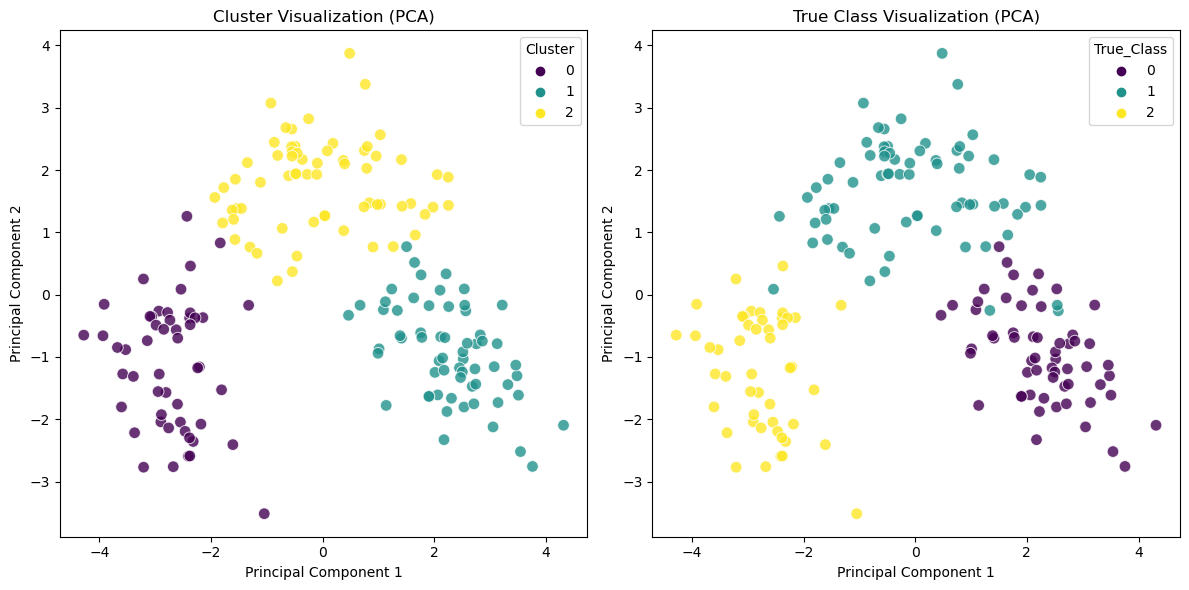

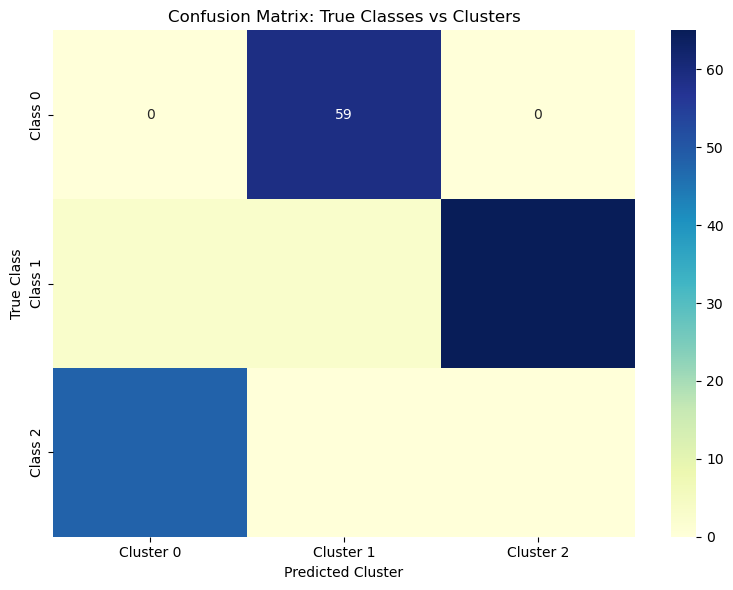

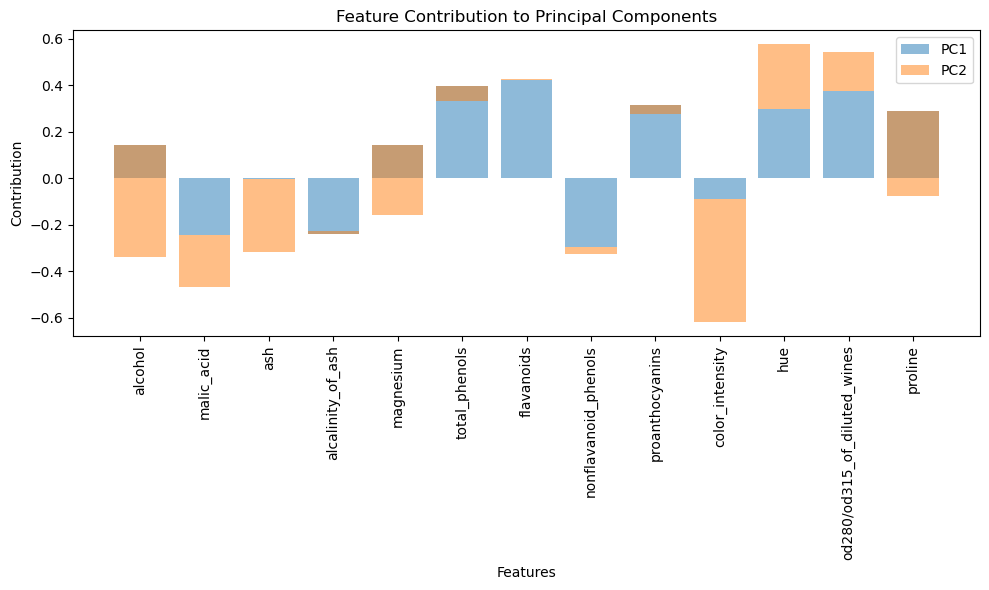

In [30]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
y_true = wine.target
scaler = StandardScaler()
scaled_wine = scaler.fit_transform(df_wine)
kmeans = KMeans(n_clusters=3, max_iter=300, n_init=10, init='k-means++', random_state=42)
kmeans.fit(scaled_wine)
y_pred = kmeans.labels_
homogeneity = homogeneity_score(y_true, y_pred)
completeness = completeness_score(y_true, y_pred)
print(f"Homogeneity Score: {homogeneity:.4f}")
print(f"Completeness Score: {completeness:.4f}")
print("\nHomogeneity measures the extent to which each cluster contains samples from a single class.")
print("A homogeneity score close to 1 means that each cluster mostly contains samples from one true class, indicating that the clustering effectively separates different classes. A lower score indicates that clusters contain mixed samples from multiple classes.")
print("\nCompleteness evaluates the extent to which samples from the same class are assigned to the same cluster.")
print("A completeness score close to 1 means that most samples from the same class are grouped into the same cluster, preserving the class integrity well. A lower score indicates that samples from the same class are scattered across different clusters.")
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_wine)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = y_pred
principal_df['True_Class'] = y_true
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df, palette='viridis', s=70, alpha=0.8)
plt.title('Cluster Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='True_Class', data=principal_df, palette='viridis', s=70, alpha=0.8)
plt.title('True Class Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix: True Classes vs Clusters')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Class')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
plt.bar(range(len(pca.components_[0])), pca.components_[0], alpha=0.5, label='PC1')
plt.bar(range(len(pca.components_[1])), pca.components_[1], alpha=0.5, label='PC2', bottom=pca.components_[0])
plt.xticks(range(len(wine.feature_names)), wine.feature_names, rotation=90)
plt.title('Feature Contribution to Principal Components')
plt.xlabel('Features')
plt.ylabel('Contribution')
plt.legend()
plt.tight_layout()
plt.show()